# Рубежный контроль 1

### Селедкина Алиса, ИУ5-62Б, вариант 15

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему? Для произвольной колонки данных построить гистограмму.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('data/restaurant-scores-lives-standard.csv', ',')
data.shape

(53973, 17)

In [3]:
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

In [4]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


### Обработка пропусков для количественного признака

In [5]:
# Выберем числовые колонки с пропущенными значениями
rows_num = data.shape[0]
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    if null_count > 0 and (col_type == 'float64' or col_type == 'int64'):
        percent = round(null_count / rows_num * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, col_type, null_count, percent))

Колонка business_latitude. Тип данных float64. Количество пустых значений 24095, 44.64%.
Колонка business_longitude. Тип данных float64. Количество пустых значений 24095, 44.64%.
Колонка business_phone_number. Тип данных float64. Количество пустых значений 36539, 67.7%.
Колонка inspection_score. Тип данных float64. Количество пустых значений 14114, 26.15%.


Обработаем пропуски в колонке inspection_score.

In [6]:
score_col = 'inspection_score'
data_score_col = data[[score_col]]

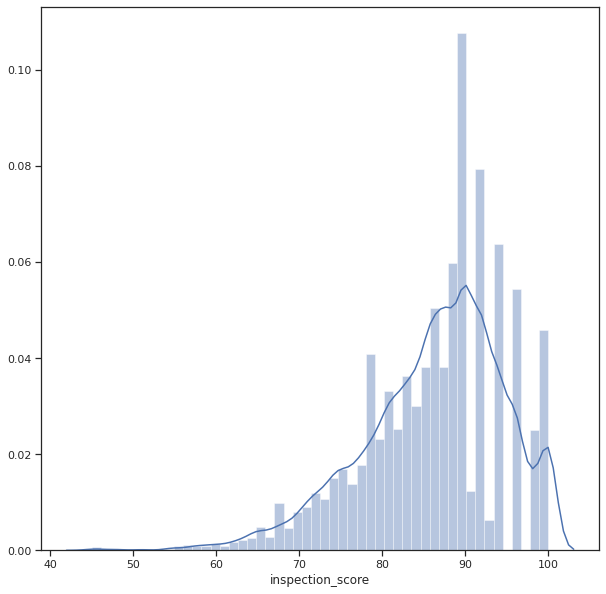

In [7]:
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.distplot(data[score_col])

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [9]:
indicator_num = MissingIndicator()
mask_missing_values_num = indicator_num.fit_transform(data_score_col)
mask_missing_values_num

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [10]:
# Заполнение пропусков средним значением
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(data_score_col)
data_num_imp[mask_missing_values_num]

array([86.23525427, 86.23525427, 86.23525427, ..., 86.23525427,
       86.23525427, 86.23525427])

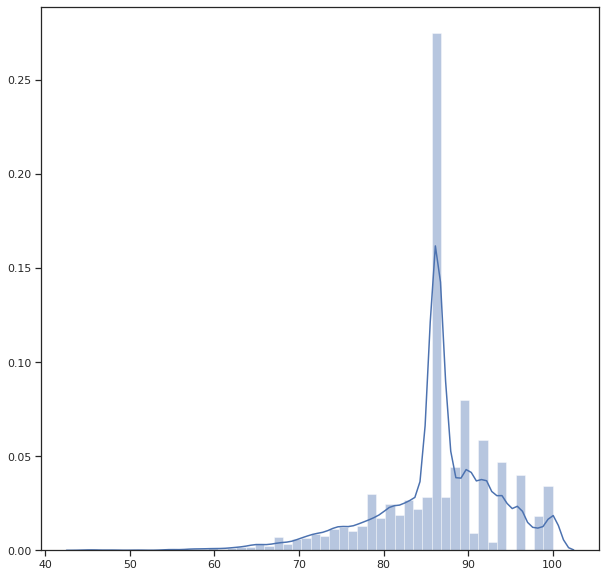

In [11]:
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.distplot(data_num_imp)

Как видно из гистограммы, недостатком заполнения пропусков средним значением является искажение распределения.

### Обработка пропусков для категориального признака

In [12]:
# Выберем категориальные колонки с пропущенными значениями
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    if null_count > 0 and col_type == 'object':
        percent = round(null_count / rows_num * 100.0, 2)
        unique_num = len(data[col].unique())
        print('Колонка {}. Количество пустых значений {}, {}%. Уникальных значений {}.'.format(col, null_count, percent, unique_num))

Колонка business_postal_code. Количество пустых значений 1083, 2.01%. Уникальных значений 63.
Колонка business_location. Количество пустых значений 24095, 44.64%. Уникальных значений 2369.
Колонка violation_id. Количество пустых значений 13462, 24.94%. Уникальных значений 35842.
Колонка violation_description. Количество пустых значений 13462, 24.94%. Уникальных значений 66.
Колонка risk_category. Количество пустых значений 13462, 24.94%. Уникальных значений 4.


Обработаем пропуски в колонке risk_category.

In [13]:
risk_col = 'risk_category'
data_risk_col = data[[risk_col]]

In [14]:
data[risk_col].unique()

array(['Moderate Risk', nan, 'Low Risk', 'High Risk'], dtype=object)

In [15]:
indicator_cat = MissingIndicator()
mask_missing_values_cat = indicator_cat.fit_transform(data_risk_col)
mask_missing_values_cat

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [16]:
# Заполнение пропусков наиболее часто встречающимся значением
imp_cat = SimpleImputer(strategy='most_frequent')
data_cat_imp = imp_cat.fit_transform(data_risk_col)
data_cat_imp[mask_missing_values_cat]

array(['Low Risk', 'Low Risk', 'Low Risk', ..., 'Low Risk', 'Low Risk',
       'Low Risk'], dtype=object)

In [26]:
np.unique(data_cat_imp)

array(['High Risk', 'Low Risk', 'Moderate Risk'], dtype=object)

При заполнении пропусков категориального признака модой проявляются те же недостатки, что и при заполнении пропусков количественного признака средним значением. Если пропусков немного, данные методы не приведут к значительным искажениям результатов. Однако для более точных результатов целесообразно использовать более сложные методы, такие как линейная регрессия.